In [22]:

import pandas as pd
# loading data
# got the data file from https://github.com/plotly/datasets/blob/master/timeseries.csv
ts_df = pd.read_csv('timeseries.csv')
ts_df['Date'] = pd.to_datetime(ts_df.Date)
#ts_df.info()


FileNotFoundError: [Errno 2] No such file or directory: 'timeseries_file'

# Tutorial de Matplotlib: Otimizando a Comunicação de Dados em Artigos Científicos e Apresentações

Ao escrever um artigo científico, preparar um pôster ou criar uma apresentação oral, a habilidade de comunicar dados de forma clara e impactante é essencial. No cenário acadêmico e científico, a forma como apresentamos nossas descobertas desempenha um papel crucial na compreensão e aceitação de nossos resultados.

Neste tutorial abrangente, exploraremos como a biblioteca Matplotlib pode ser sua aliada na busca por figuras e visualizações que não apenas transmitam informações, mas também as tornem visualmente atraentes e memoráveis. Vamos abordar não apenas como criar gráficos com o Matplotlib, mas também as melhores práticas e estratégias para tornar suas representações visuais uma parte valiosa de seu trabalho.

## Por que Investir na Visualização de Dados?

A visualização de dados vai muito além de apenas criar gráficos. É uma ferramenta poderosa para:

- **Clareza de Comunicação**: Visualizações bem projetadas simplificam a compreensão dos dados, tornando mais fácil para o público absorver informações complexas.

- **Atrair a Atenção**: Gráficos e figuras visualmente atraentes são mais cativantes e podem destacar seus resultados em meio a uma grande quantidade de informações.

- **Comparação e Análise**: Gráficos bem estruturados facilitam a comparação de dados e a identificação de padrões, tendências e anomalias.

- **Apoiar Argumentos**: Visualizações de dados sólidas podem reforçar seus argumentos e hipóteses, fornecendo evidências visuais.

## Como o Matplotlib Pode Ajudar

O Matplotlib é uma das bibliotecas mais populares e versáteis para visualização de dados em Python. Ele oferece controle total sobre a criação de gráficos personalizados e detalhados, desde gráficos simples de linha até visualizações 3D complexas. No entanto, a capacidade de criar visualizações atraentes requer não apenas conhecimento técnico, mas também habilidades de design e compreensão das melhores práticas.

Neste tutorial, abordaremos desde conceitos fundamentais até técnicas avançadas. Vamos aprender a criar visualizações de dados que otimizam a comunicação em seus artigos, pôsteres e apresentações.

## Vamos começar!

### Primeiro passo: importar as bibliotecas necessárias

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import os


#### Estrutura Básica: Figure e Axes

O Matplotlib é baseado em duas estruturas principais:

- **Figure**: Representa a área de exibição do gráfico, que pode conter um ou mais Eixos (Axes).
- **Axes**: É onde os dados são plotados, permitindo personalização de rótulos, legendas e estilos.


#### Graficos Básicos
Vamos criar alguns gráficos básicos para explorar os recursos iniciais do Matplotlib.

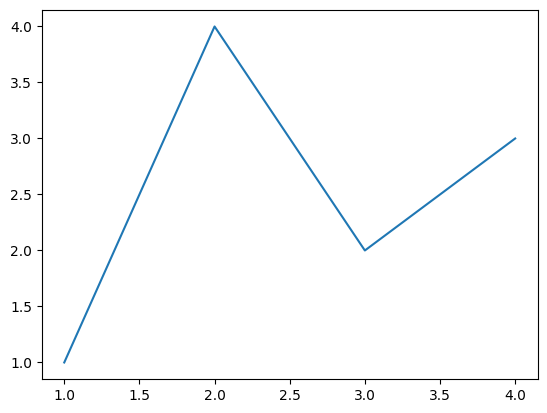

In [6]:
fig, ax = plt.subplots()  # Cria-se uma figura com somente 1 eixo
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # plota os dados nos eixos.

### A anatomia de uma figura

<img src="anatomy.webp"  width="800" height="800">



/var/folders/j_/87vk7tmn76q8_v_9k8rzcx8c0000gp/T/ipykernel_46768/2942138823.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


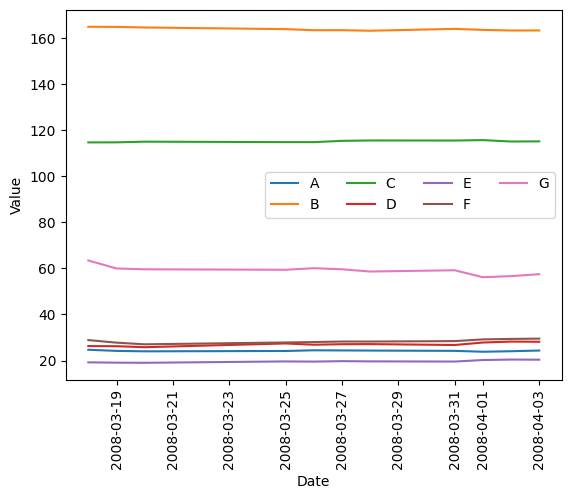

In [13]:
fig, ax = plt.subplots()
for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
    ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
ax.tick_params(axis='x', labelrotation = 90)
ax.set(xlabel='Date', ylabel='Value')
ax.legend(loc='center right', ncol=4)
fig.show()


Este código cria um espaço para a figura e os eixos, e traça uma linha separada para cada coluna no dataframe. Em seguida, ele rotaciona os rótulos do eixo x em 90 graus para evitar sobreposição dos valores dos marcadores. O método fig.show() mostra a figura.

No entanto, na maioria das vezes, usamos o método fig.savefig() para armazenar a figura resultante. O primeiro parâmetro dessa chamada é o caminho para o arquivo onde a figura deve ser armazenada. Note que o diretório que contém o arquivo deve existir; caso contrário, você receberá um erro. Com base na extensão do arquivo, o Matplotlib tentará determinar o formato da figura. Para artigos científicos, o formato PDF é praticamente o padrão: o Matplotlib armazena figuras vetoriais se o formato PDF for usado, e o pdflatex, que normalmente usamos para compilar nossos artigos em LaTeX, pode incorporar figuras desse tipo. Ao longo do artigo, eu uso principalmente o seguinte código para armazenar figuras (consulte a seção "Salvando Figuras" para uma abordagem aprimorada):

In [16]:
fig.savefig(
    os.path.join("figuras", '2.pdf'),
    bbox_inches='tight',
)

### Estilo da Figura
##### A biblioteca Matplotlib oferece recursos para alterar a aparência de todos os componentes de um gráfico. 

Por exemplo, ela fornece opções para alterar o plano de fundo, adicionar e ajustar as grades, ajustar títulos, marcas e a localização e apresentação de textos, definir fontes para diferentes elementos do gráfico, etc. No entanto, dada a grande quantidade desses parâmetros, configurar todos eles é quase uma tarefa impossível. 

Portanto, o Matplotlib possui vários estilos embutidos que alteram valores de parâmetros em massa. A lista de estilos disponíveis pode ser encontrada na propriedade plt.style.available. O código a seguir pode ser usado para visualizar os estilos disponíveis (consulte a Figura 4 para ver o resultado):

/var/folders/j_/87vk7tmn76q8_v_9k8rzcx8c0000gp/T/ipykernel_46768/270612754.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


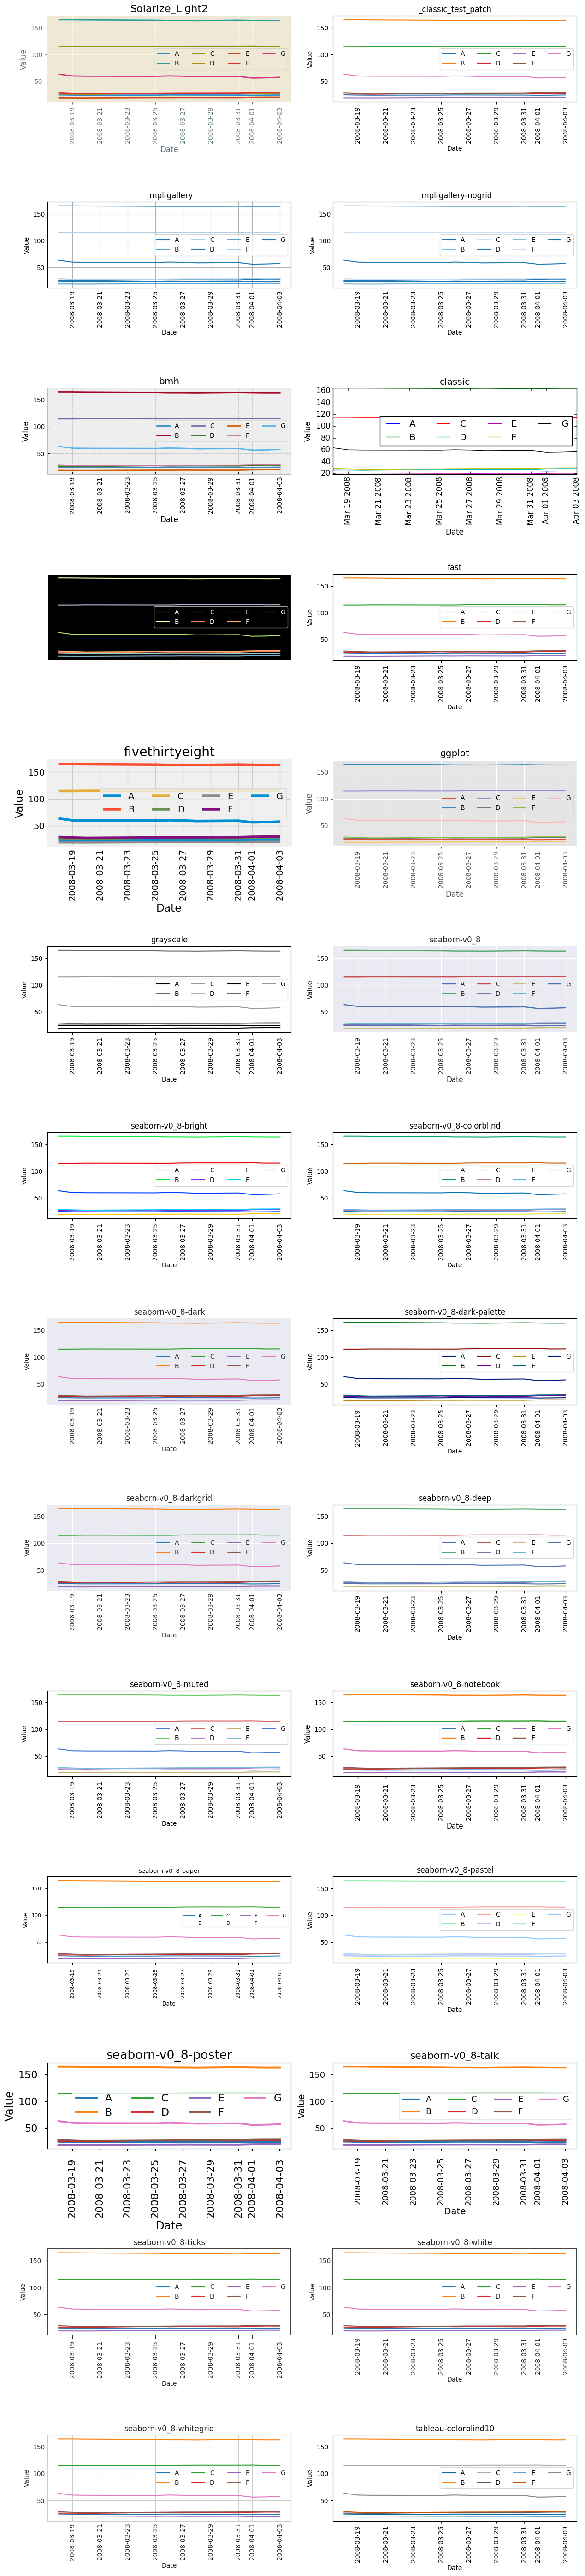

In [17]:
import math

available_styles = plt.style.available
n_styles = len(available_styles)

fig = plt.figure(dpi=100, figsize=(12.8, 4*n_styles/2), tight_layout=True)
for i, style in enumerate(available_styles):
    with plt.style.context(style):
        ax = fig.add_subplot(math.ceil(n_styles/2.0), 2, i+1)
        for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
            ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
        ax.tick_params(axis='x', labelrotation = 90)
        ax.set(xlabel='Date', ylabel='Value')
        ax.legend(loc='center right', ncol=4)
        ax.set_title(style)

fig.show()

/var/folders/j_/87vk7tmn76q8_v_9k8rzcx8c0000gp/T/ipykernel_46768/1952872926.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor

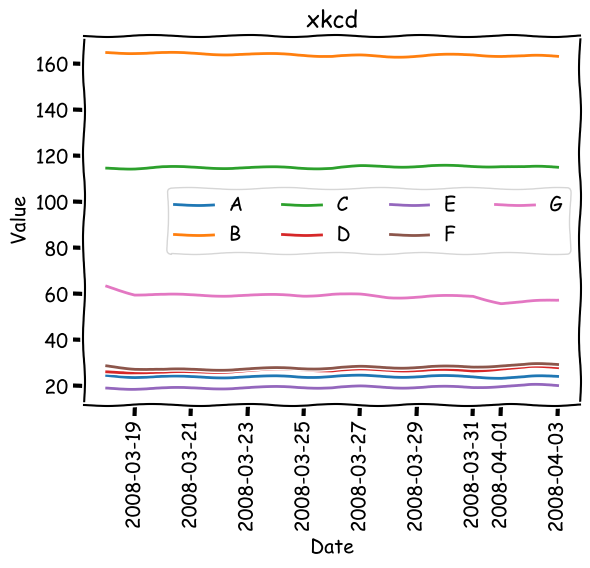

In [18]:
with plt.xkcd():
    fig, ax = plt.subplots()
    for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
        ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
    ax.set_title('xkcd')
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set(xlabel='Date', ylabel='Value')
    ax.legend(loc='center right', ncol=4)
    fig.show()

### Aumentando a Distinção entre Linhas
Infelizmente, as paletas padrão têm um número baixo de cores predefinidas. Por exemplo, o estilo "seaborn-colorblind" define apenas seis cores. 

Portanto, se você tiver mais de seis variáveis diferentes para traçar no mesmo gráfico, algumas delas terão a mesma cor. 
Por exemplo, na Figura 7, você pode ver que as Linhas A e G têm a mesma cor. Ao mesmo tempo, na pesquisa, é comum ter que combinar um número ainda maior de resultados de experimentos no mesmo gráfico. Claro, você pode usar estilos que têm um maior número de cores predefinidas em sua paleta. No entanto, a abordagem melhor é usar outros aspectos visuais. 

Felizmente, o Matplotlib fornece algumas facilidades para fazer isso: você pode usar marcadores diferentes ou estilos de linha diferentes. A primeira abordagem é útil quando você tem vários pontos esparsos e a linha os une. A última abordagem é conveniente quando o número de pontos é muito alto ou eles estão próximos uns dos outros. De qualquer forma, o método mais prático para ambas as abordagens é definir um objeto Cycler personalizado que itere sobre diferentes marcadores ou estilos de linha. 

Além disso, as cores das linhas e dos marcadores podem ser outro mecanismo para distinguir as linhas.

Um objeto Cycler personalizado, usado para alterar estilos de linha em gráficos, é definido com um método de fábrica auxiliar chamado "cycler" definido no módulo "cycler". Por exemplo, o código a seguir importa essa função e define um Cycler personalizado com diferentes marcadores:

In [20]:
from cycler import cycler
custom_marker_cycler = (cycler(marker=['o', 'x', 's', 'P']))

/var/folders/j_/87vk7tmn76q8_v_9k8rzcx8c0000gp/T/ipykernel_46768/3972688084.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


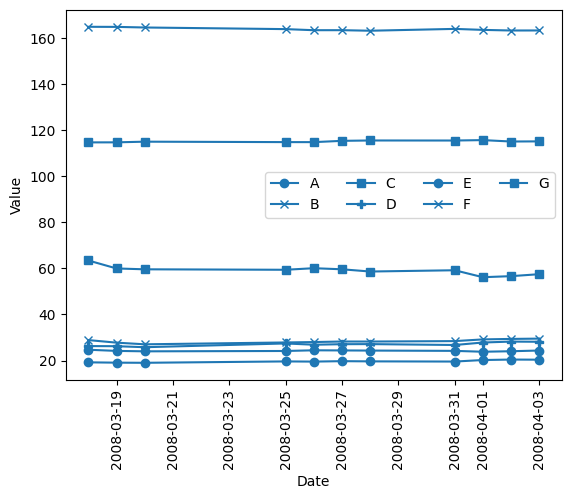

In [21]:
fig, ax = plt.subplots()

ax.set_prop_cycle(custom_marker_cycler) # setting the cycler for the current figure 

for indx, column_name in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
    ax.plot(ts_df['Date'], ts_df[column_name], label=column_name)
ax.tick_params(axis='x', labelrotation = 90)
ax.set(xlabel='Date', ylabel='Value')
ax.legend(loc='center right', ncol=4)

fig.show()